In [1]:
#On importe les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
#On ouvre le fichier 'population.csv' dans un dataframe appelé 'df_popu'
df_popu = pd.read_csv(filepath_or_buffer= 'population.csv' ,sep = ',' ,header = 0 , index_col = 0)

	Un fichier de population qui inclut :

#-	Le pays.

#-	L’année.

#-	La population du pays, exprimée en milliers d’habitants.

In [4]:
#On effectue un premier apperçu de df_popu
df_popu.head(10)

,Année,Valeur
Zone,,
Afghanistan,2013,32269.589
Afghanistan,2014,33370.794
Afghanistan,2015,34413.603
Afghanistan,2016,35383.032
Afghanistan,2017,36296.113
Afghanistan,2018,37171.921
Afrique du Sud,2013,53687.121
Afrique du Sud,2014,54544.186
Afrique du Sud,2015,55386.367


In [5]:
#On regarde une description de df_popu
df_popu.describe()

,Année,Valeur
count,1416.000000,1.416000e+03
mean,2015.500000,3.144793e+04
std,1.708428,1.300812e+05
min,2013.000000,7.930000e-01
25%,2014.000000,3.783410e+02
50%,2015.500000,5.126480e+03
75%,2017.000000,1.930666e+04
max,2018.000000,1.427648e+06


In [6]:
#On regarde les informations concernant df_popu
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1416 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Année   1416 non-null   int64  
 1   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 33.2+ KB


In [7]:
#On ouvre le fichier 'sous_nutrition.csv' dans un dataframe appelé 'df_nutri'
df_nutri = pd.read_csv(filepath_or_buffer= 'sous_nutrition.csv' ,sep = ',' ,header = 0 , index_col = 0)

#Un fichier d’insécurité alimentaire, qui inclut :

#-	Le pays.

#-	Intervalle d’années.

#-	Le nombre de personnes en sous-alimentation en millions d’habitants (ex. : pour l’intervalle 2012-2014, le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2013).


In [8]:
#On effectue un premier apperçu de df_nutri
df_nutri.head(10)

,Année,Valeur
Zone,,
Afghanistan,2012-2014,8.6
Afghanistan,2013-2015,8.8
Afghanistan,2014-2016,8.9
Afghanistan,2015-2017,9.7
Afghanistan,2016-2018,10.5
Afghanistan,2017-2019,11.1
Afrique du Sud,2012-2014,2.2
Afrique du Sud,2013-2015,2.5
Afrique du Sud,2014-2016,2.8


In [9]:
#On regarde une description de df_nutri
df_nutri.describe()

,Année,Valeur
count,1218,624
unique,6,139
top,2013-2015,<0.1
freq,203,120


In [10]:
#On regarde les informations concernant df_nutri
df_nutri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Année   1218 non-null   object
 1   Valeur  624 non-null    object
dtypes: object(2)
memory usage: 28.5+ KB


##                                            Question 1: état de sous-nutrition

In [11]:
#On regarde les valeur unique de la colonne "Année" de df_nutri
print(df_nutri['Année'].unique())

['2012-2014' '2013-2015' '2014-2016' '2015-2017' '2016-2018' '2017-2019']


In [12]:
# on remplace les valeurs de "Année" du dataframe df_nutri
df_nutri['Année'] = df_nutri['Année'].replace(['2012-2014', '2013-2015','2014-2016','2015-2017','2016-2018','2017-2019'],['2013', '2014','2015','2016','2017','2018'])

#on change le type de la colonne 'Année' de df_nutri en 'int' pour la merge
df_nutri['Année']=df_nutri['Année'].astype(int)

In [13]:
#On merge les df_popu et df_nutri ensemble sur les colonnes 'Zone' et Année' dans une nouveau df appelé 'df1'
df1=df_popu.merge(right=df_nutri, on=['Zone','Année'] )

In [14]:
#on change le nom de la colonne 'valeur_x' en 'valeur_population' et 'valeur_y' en 'valeur_sous_nutrition'
df1= df1.rename(columns = {'Valeur_x': 'valeur_population','Valeur_y': 'valeur_sous_nutrition'})


In [15]:
#On change le type objet de "valeur_sous_nutrition" en numerique
df1['valeur_sous_nutrition'] = pd.to_numeric(df1['valeur_sous_nutrition'],errors = 'coerce')

In [16]:
#On garde maintenant que les données concernant l'année 2017 dans un nouveau dataframe df2017
df2017 =df1[df1.Année==2017]

In [17]:
#on recherche la valeur_population maximal 
df2017['valeur_population'].idxmax(axis = 0)

'Chine, continentale'

In [18]:
#on affiche les informations sur la chine continentale
print(df2017.loc['Chine, continentale'])

Année                       2017.000
valeur_population        1421021.791
valeur_sous_nutrition            NaN
Name: Chine, continentale, dtype: float64


In [19]:
#on recherche la valeur_population minimal 
df2017['valeur_population'].idxmin(axis = 0)

'Tokélaou'

In [20]:
#on affiche les informations sur le tokelaou
print(df2017.loc['Tokélaou'])

Année                    2017.0
valeur_population           1.3
valeur_sous_nutrition       NaN
Name: Tokélaou, dtype: float64


In [21]:
#On regarde les valeur unique de la colonne "Année" de df2017
print(df2017['Année'].unique())
#on a bien uniquement l'année 2017

[2017]


In [22]:
#on multiplie les valeur de la colonne 'valeur_sous_nutrition' par 1000 pour obtenir une valeur en millier
df2017['valeur_sous_nutrition'] = df2017['valeur_sous_nutrition'] * 1000

In [23]:
#On affiche notre dataframe df2017
df2017.head(10)

,Année,valeur_population,valeur_sous_nutrition
Zone,,,
Afghanistan,2017,36296.113,10500.0
Afrique du Sud,2017,57009.756,3100.0
Albanie,2017,2884.169,100.0
Algérie,2017,41389.189,1300.0
Allemagne,2017,82658.409,NaN
Andorre,2017,77.001,NaN
Angola,2017,29816.766,5800.0
Antigua-et-Barbuda,2017,95.426,NaN
Arabie saoudite,2017,33101.179,1600.0


In [24]:
#on calcule la somme de la population en 2017
total_population2017 = np.round(df2017['valeur_population'].sum(),3)
#On divise le total population par 1000000 pour avoir un resultat en Milliard d'habitant
population2017 = np.round(total_population2017/1000000,3)
#on affiche la somme de la population en 2017
print ("En 2017 la population atteint un total de:",population2017,"milliard d'habitants")
#on calcule la somme de la population en sous nutrition en 2017
total_sous_nutrition2017 = df2017['valeur_sous_nutrition'].sum()
#On divise le total population en sous nutrition par 1000 pour avoir un resultat en Millions d'habitants
sous_nutrition2017 = np.round(total_sous_nutrition2017/1000,3)
#on affiche la somme de la population en sous nutrition en 2017
print ("En 2017 la population en sous nutrition atteint un total de:",sous_nutrition2017,"millions d'habitants")

En 2017 la population atteint un total de: 7.544 milliard d'habitants
En 2017 la population en sous nutrition atteint un total de: 535.7 millions d'habitants


In [25]:
#On calcule la propotion de population en etat de sous nutrition pour 2017
proportion_sous_nutrition=np.round((total_sous_nutrition2017/total_population2017)*100,2)
#On affiche le Pourcentage de population en état de sous nutrition pour 2017
print('la proportion de personnes en état de sous-nutrition en 2017 est de:',proportion_sous_nutrition,'%')

la proportion de personnes en état de sous-nutrition en 2017 est de: 7.1 %


##                                            Question 2: Nombre théorique de personne qui pourraient être nourries

In [26]:
#On ouvre le fichier csv 'dispo alimentaire' dans un dataframe aappelé df_dispo
df_dispo = pd.read_csv(filepath_or_buffer= 'dispo_alimentaire.csv' ,sep = ',' ,header = 0 , index_col = 0)

	Un fichier de disponibilité alimentaire pour l’année 2017 qui contient 17 variables :

#-	Le pays.

#-	Le produit.

#-	4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter cependant que la notation kcal est un abus de langage, elle correspond à une calorie réelle.

#-	10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en milliers de tonnes.

#-	Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.

#●	La disponibilité alimentaire correspond à la disponibilité d'aliments en quantité suffisante et d'une qualité appropriée pour l’alimentation humaine.

#●	La disponibilité intérieure correspond à la disponibilité totale d’un aliment au sein du pays.

In [27]:
#On affiche une description de df_dispo
df_dispo.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [28]:
#On affiche les informations de df_dispo
df_dispo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15605 entries, Afghanistan to Îles Salomon
Data columns (total 17 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Produit                                                        15605 non-null  object 
 1   Origine                                                        15605 non-null  object 
 2   Aliments pour animaux                                          2720 non-null   float64
 3   Autres Utilisations                                            5496 non-null   float64
 4   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 5   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 6   Disponibilité de matière grasse en quantité (g/personne/jour)  11794 non-null  float64
 7   Disponibilité de protéines en quantité (g/pers

In [29]:
#On affiche le dataframe df_dispo
df_dispo.head()

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN



 Disponibilité intérieure = Production + Importations + Variation - Exportations 
 = Nourriture + Aliments animaux + Semences + Pertes + Traitement + Autres utilisations

In [30]:
#On renomme deux pays de df2017, pour qu'ils correspondent aux. pays de df_dispo
df2017.rename(index={'Tchéquie': 'Tchéquie (la)',"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord": 'Royaume-Uni'}, inplace=True)

#On merge la population de df2017 sur df_dispo 
df_dispo = df_dispo.merge(df2017[['valeur_population']], how = 'left',left_on = 'Zone', right_on = 'Zone')

In [31]:
df_dispo.head()

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,valeur_population
Zone,,,,,,,,,,,,,,,,,,
Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,36296.113
Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,36296.113
Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,36296.113
Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36296.113
Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,36296.113


In [32]:
#On ajoute une colonne "population" qui contient le nombre d'habitant par pays convertie à l'unité
df_dispo["population"] = df_dispo["valeur_population"]*1000

#Puis on supprimme la colonne "valeur_population" qui n'est plus utile pour la suite
del df_dispo['valeur_population']

#Création une colonne Disponibilité en kcal/an
df_dispo['Disponibilité alimentaire en million (Kcal/jour)'] = np.round((df_dispo['Disponibilité alimentaire (Kcal/personne/jour)'] * df_dispo['population'])/1000000,2)


In [33]:
#On affiche df_dispo
df_dispo.head()

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,population,Disponibilité alimentaire en million (Kcal/jour)
Zone,,,,,,,,,,,,,,,,,,,
Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,36296113.0,181.48
Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,36296113.0,36.30
Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,36296113.0,36.30
Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36296113.0,0.00
Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,36296113.0,145.18


In [34]:
#on calcule la somme de la disponibilité alimentaire en kcal/personne/jour
total_kcal_jour =df_dispo['Disponibilité alimentaire en million (Kcal/jour)'].sum()


In [35]:
#On calcul le nombre theorique de personnes qui pourraient etre nourries
total_theorique_nourrie= total_kcal_jour / 2500

#On converti le resultat en milliard pour une lecture plus agréable
total_theorique_nourrie= np.round(total_theorique_nourrie/1000,3)

#On affiche le nombre theorique de personnes qui pourraient etre nourries
print("le nombre theorique de personnes qui pourraient etre nourries est de:",total_theorique_nourrie,"milliard d'habitants")

le nombre theorique de personnes qui pourraient etre nourries est de: 8.473 milliard d'habitants


In [36]:
#On compare le resultat obtenue en pourcentage par rapport au total de la population en 2017
pourcentage_theorique=np.round((total_theorique_nourrie/population2017)*100,2)
print("Théoriquement nous pourions nourrir",pourcentage_theorique,"% de la population mondiale")

Théoriquement nous pourions nourrir 112.31 % de la population mondiale


##                                            Question 3: Nombre théorique de personne qui pourraient être nourries avec des produits végétaux

In [37]:
#on stock dans 'dispo_vege' la sommes de la disponibilité alimentaire total des produits d'origine vegetales en million (kcal/jour)
dispo_vege = df_dispo[df_dispo['Origine']=='vegetale']['Disponibilité alimentaire en million (Kcal/jour)'].sum()

#On calcul le nombre theorique de personnes qui pourraient etre nourries avec les produits d'origine végétales
total_theorique_vege= dispo_vege / 2500

#On converti le resultat en milliard pour une lecture plus agréable
total_theorique_vege= np.round(total_theorique_vege/1000,3)

#On affiche le nombre theorique de personnes qui pourraient etre nourries avec des produits d'origine vegetales
print("le nombre theorique de personnes qui pourraient etre nourries avec des produits d'origine vegetale est de:",total_theorique_vege,"milliard d'habitants")



le nombre theorique de personnes qui pourraient etre nourries avec des produits d'origine vegetale est de: 6.98 milliard d'habitants


In [38]:
#On compare le resultat obtenue en pourcentage par rapport au total de la population en 2017
pourcentage_theorique_vege=np.round((total_theorique_vege/population2017)*100,2)
print("Théoriquement nous pourions nourrir",pourcentage_theorique_vege,"% de la population mondiale avec des produits d'origine végétale")


Théoriquement nous pourions nourrir 92.52 % de la population mondiale avec des produits d'origine végétale


##                                            Question 4: Alimentation animale

 Disponibilité intérieure = Production + Importations + Variation - Exportations 
 = Nourriture + Aliments animaux + Semences + Pertes + Traitement + Autres utilisations

In [39]:
#on calcule la somme de la disponibilité interieur 
total_dispo_interieur =df_dispo['Disponibilité intérieure'].sum()


In [40]:
#On remplace les Nan de 'Alimentation pour animaux' par 0
df_dispo['Aliments pour animaux'].fillna(0,inplace=True)
#On garde uniquement la disponibilité interieur pour l'alimentation attribué aux animaux
df_dispo_interieur_animal =df_dispo[df_dispo['Aliments pour animaux']!=0]
#on calcule la somme des aliments pour animaux 
total_alimentation_animale =df_dispo['Aliments pour animaux'].sum()


In [41]:
#Proportion de dispo interieur attribué aux animaux
total_animale=np.round((total_alimentation_animale/total_dispo_interieur)*100,2)
#On affiche la proportion de la disponibilité inbterieur attribué à l'alimentation animal
print("la proportion de la disponibilité interieur attribué à l'alimentation animal est de:",total_animale,"%")

la proportion de la disponibilité interieur attribué à l'alimentation animal est de: 13.24 %


##                                            Question 4: Alimentation perdu

In [42]:
#On fait la sommes de la disponibilité interieur pour les pertes
total_alimentation_pertes =df_dispo['Pertes'].sum()

In [43]:
#Proportion de dispo interieur perdue
total_pertes=np.round((total_alimentation_pertes/total_dispo_interieur)*100,2)
#On affiche la proportion de la disponibilité interieur perdue
print("la proportion de la disponibilité interieur perdue est de:",total_pertes,"%")

la proportion de la disponibilité interieur perdue est de: 4.61 %


## Question 4: Alimentation humaine

In [44]:
#On fait la sommes de la disponibilité interieur pour l'alimentation humaine
total_alimentation_humaine =df_dispo['Nourriture'].sum()

In [45]:
#Proportion de dispo interieur pour l'alimenttion humaine
total_humaine=np.round((total_alimentation_humaine/total_dispo_interieur)*100,2)
#On affiche la proportion de la disponibilité interieur pour l'alimentation humaine
print("la proportion de la disponibilité interieur pour l'alimentation humaine est de:",total_humaine,"%")

la proportion de la disponibilité interieur pour l'alimentation humaine est de: 49.51 %


## Visualisation disponibilitées alimentaires

In [46]:
#On creer df_pie pour faire une visualisation des disponibilitées alimentaires
df_pie=df_dispo.drop(df_dispo.columns[[0,1,4,5,6,7,8,9,10,13,16,17,18]], axis=1).sum()

In [47]:
df_pie.head(10)

Aliments pour animaux    1304245.0
Autres Utilisations       865023.0
Nourriture               4876258.0
Pertes                    453698.0
Semences                  154681.0
Traitement               2204687.0
dtype: float64

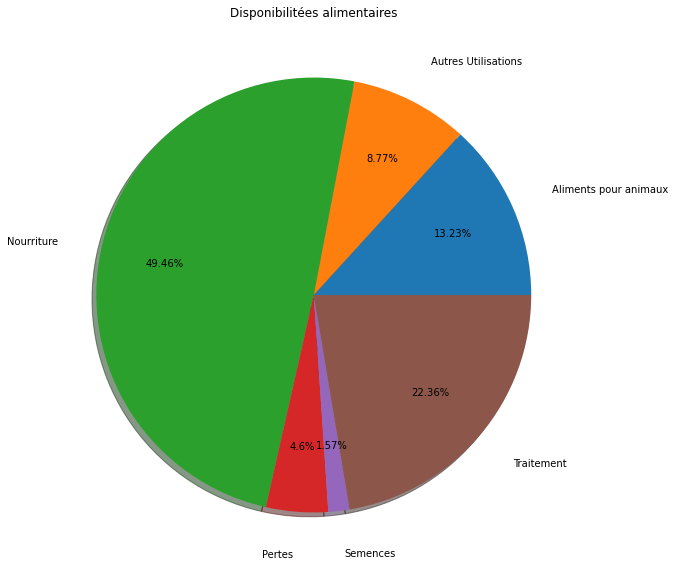

In [48]:
#On definit la taille du Pie plot
plt.figure(figsize = (10, 10))

#On regle et on affiche le Pie plot
plt.pie(x = df_pie.head(6), labels=['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement'],
           explode = [0, 0, 0, 0, 0, 0],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.2,
           shadow = True)
plt.title('Disponibilitées alimentaires');

##                                            Question Julien: Céréale

#Listes des cereale 2013 et 2017

#Pour 2013: cereale = 'Blé', 'Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle'.

#Pour 2017: cereale = 'Blé et produits','Céréales, Autres', 'Maïs et produits', 'Millet et produits','Orge et produits', 'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits'

In [49]:
#Dispo cereale 2017

liste_cereale2017 = ['Blé et produits','Céréales, Autres', 'Maïs et produits', 'Millet et produits','Orge et produits', 'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits']
df_cereale2017 = df_dispo[df_dispo["Produit"].isin(liste_cereale2017)].groupby("Zone").sum().reset_index() 
prop_list2017 = [df_cereale2017['Aliments pour animaux'].sum() / df_cereale2017["Disponibilité intérieure"].sum(),
df_cereale2017['Nourriture'].sum() / df_cereale2017["Disponibilité intérieure"].sum(),]
prop_list2017.append(1-prop_list2017[0]-prop_list2017[1])

In [50]:
#On affiche les resultats de 2017
prop_list2017

[0.6933506248526291, 0.18130550970683015, 0.12534386544054074]

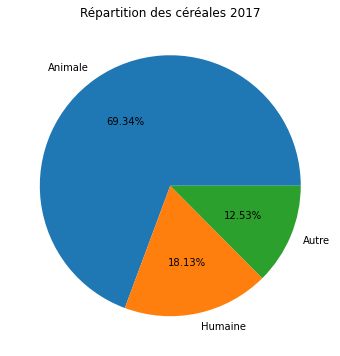

In [51]:
#On regle la taille du pie plot
plt.figure(figsize = (6, 6))
#On affiche le pie plot 
plt.pie(prop_list2017, labels = [ 'Animale','Humaine', 'Autre'],autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Répartition des céréales 2017');

In [52]:
#Dispo cereale 2013

liste_cereale2013 = ['Blé','Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle']
df_cereale2013 = df_dispo[df_dispo["Produit"].isin(liste_cereale2013)].groupby("Zone").sum().reset_index() 
prop_list2013 = [df_cereale2013['Aliments pour animaux'].sum() / df_cereale2013["Disponibilité intérieure"].sum(),
df_cereale2013['Nourriture'].sum() / df_cereale2013["Disponibilité intérieure"].sum(),]
prop_list2013.append(1-prop_list2013[0]-prop_list2013[1])

In [53]:
#On affiche les resultats de 2013
prop_list2013

[0.36291456706047653, 0.4275074480712289, 0.20957798486829454]

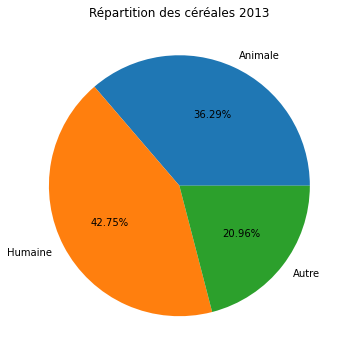

In [54]:
#On regle la taille du pie plot
plt.figure(figsize = (6, 6))
#On affiche le pie plot 
plt.pie(prop_list2013, labels = [ 'Animale','Humaine', 'Autre'],autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Répartition des céréales 2013');

##                                            Question Julien: Manioc

In [55]:
#On ajoute un index
df_dispo = df_dispo.reset_index()
#On crée la variable "exportation_manioc" qui correspond à aux données de la Thailande sur le produit 'manioc'
exportation_manioc = df_dispo.loc[(df_dispo['Produit'] == "Manioc") & (df_dispo['Zone'] == "Thaïlande"),:]

In [56]:
#On affiche les données concernant le manioc en Thailande
exportation_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,population,Disponibilité alimentaire en million (Kcal/jour)
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,69209810.0,2768.39


In [57]:
#On affiche la proportion exportée à partir de la production
print("La proportion de manioc exportée est de:", "{:.2f}".format(exportation_manioc['Exportations - Quantité'].iloc[0]*100 /exportation_manioc['Production'].iloc[0]), "%")

La proportion de manioc exportée est de: 83.41 %


In [58]:
#On recupere la population + la population en sous nutrition en 2017 en Thailande dans df_popu_thailande
df_popu_thailande = df2017.loc['Thaïlande']
#On calcule le pourcentage de sous nutrition en Thailande en 2017
sous_nutrition_thailande = np.round((df_popu_thailande['valeur_sous_nutrition'] / df_popu_thailande['valeur_population'])*100,2)
#On affiche le pourcentge de sous-nutriton en Thailande pour 2017
print("le pourcentage de sous-nutrition en thailande est de:",sous_nutrition_thailande,"%")


le pourcentage de sous-nutrition en thailande est de: 8.96 %


In [59]:
exportation_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,population,Disponibilité alimentaire en million (Kcal/jour)
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,69209810.0,2768.39


1kg de manioc = 1250 à 1400kcal selon mes recherches sur internet, je choisi de prendre la valeur la plus basse pour la suite

source: https://devsante.org/articles/le-manioc#:~:text=Il%20a%20une%20forte%20teneur,de%20manioc%20frais%20et%20pelé.

Production x 1000000 = production en kilo, x1250(kcal pour 1 kilo) / 2500(kcal theorique par personne par jour) /365 (nombre de jours dans une année)

In [60]:
#On affiche le nombre theorique de personnes qui pourraient etre nourries avec l'exportation de manioc en Thailande

print("Le nombre d'habitants qui pourraient etre nourries avec l'exportation de manioc en Thailande est:","{:.0f}".format(exportation_manioc['Exportations - Quantité'].iloc[0]*1000000*1250 /2500/365),"habitants")
print("Ce qui représente:", "{:.2f}".format(exportation_manioc['Exportations - Quantité'].iloc[0]*1000000*1250 /2500/365/exportation_manioc['population'].iloc[0]*100), "% de la population de Thailande")
      

Le nombre d'habitants qui pourraient etre nourries avec l'exportation de manioc en Thailande est: 34539726 habitants
Ce qui représente: 49.91 % de la population de Thailande


## Questions de Mélanie

## Question 1: Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017


In [61]:
df2017.head()

,Année,valeur_population,valeur_sous_nutrition
Zone,,,
Afghanistan,2017,36296.113,10500.0
Afrique du Sud,2017,57009.756,3100.0
Albanie,2017,2884.169,100.0
Algérie,2017,41389.189,1300.0
Allemagne,2017,82658.409,NaN


In [62]:
#Création de la colonnes Proportion de sous nutrition
df2017['pourcentage_sous_nutrition'] = np.round((df2017['valeur_sous_nutrition'] / df2017['valeur_population'])*100,2)

In [63]:
df2017.dropna(subset = ["pourcentage_sous_nutrition"], inplace=True)

In [64]:
#On affiche les 10 pays avec le taux de sous-nutriton les plus élevés en 2017
df2017.sort_values(by = 'pourcentage_sous_nutrition', ascending = False).head(10)

,Année,valeur_population,valeur_sous_nutrition,pourcentage_sous_nutrition
Zone,,,,
Haïti,2017,10982.366,5300.0,48.26
République populaire démocratique de Corée,2017,25429.825,12000.0,47.19
Madagascar,2017,25570.512,10500.0,41.06
Libéria,2017,4702.226,1800.0,38.28
Lesotho,2017,2091.534,800.0,38.25
Tchad,2017,15016.753,5700.0,37.96
Rwanda,2017,11980.961,4200.0,35.06
Mozambique,2017,28649.018,9400.0,32.81
Timor-Leste,2017,1243.258,400.0,32.17


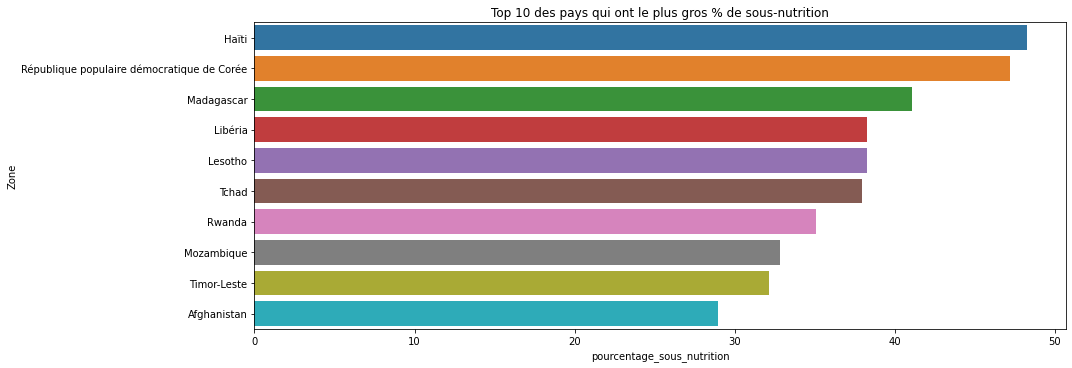

In [65]:
#On affiche un graphique avec les 10 pays qui ont le plus gros pourcentage de sous-nutrition
top_10_nutri = df2017.sort_values(by = 'pourcentage_sous_nutrition', ascending = False)[:10]
plt.figure(figsize = (15, 5))
sns.barplot(data=top_10_nutri, x="pourcentage_sous_nutrition", y=top_10_nutri.index)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus gros % de sous-nutrition")
plt.show()

## Question 2: Les pays qui ont le plus bénéficié d’aide depuis 2013

In [66]:
#On ouvre le fichier csv 'dispo alimentaire' dans un dataframe aappelé df_dispo
df_aide = pd.read_csv(filepath_or_buffer= 'aide_alimentaire.csv' ,sep = ',' ,header = 0 , index_col = 0)

In [67]:
#On affiche df_aide
df_aide.head()

,Année,Produit,Valeur
Pays bénéficiaire,,,
Afghanistan,2013,Autres non-céréales,682
Afghanistan,2014,Autres non-céréales,335
Afghanistan,2013,Blé et Farin,39224
Afghanistan,2014,Blé et Farin,15160
Afghanistan,2013,Céréales,40504


	Un fichier d’aide alimentaire qui contient :
-	Le pays bénéficiaire.
-	L’année.
-	Le produit.
-	La quantité qui a été donnée comme aide alimentaire, en tonnes.


In [68]:
#On supprimme les colonne Produit et année
df_aide_recu= df_aide.drop(columns=['Produit', 'Année'])

#On affiche le dataframe de façon plus lisible, en groupant par Pays et Année, puis en fesant la sommes des lignes groupées
df_aide_recu = df_aide.groupby(['Pays bénéficiaire']).agg({'Valeur': np.sum})
df_aide_recu.head()

,Valeur
Pays bénéficiaire,
Afghanistan,185452
Algérie,81114
Angola,5014
Bangladesh,348188
Bhoutan,2666


In [69]:

#On affiche les 10 pays qui ont le plus bénéficié d'aide depuis 2013
df_aide_recu.sort_values(by = 'Valeur', ascending = False).head(10)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


<function matplotlib.pyplot.show(close=None, block=None)>

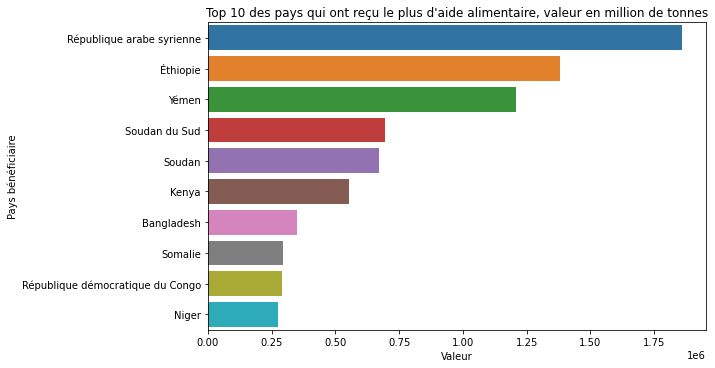

In [70]:
#On affiche un graphique avec les 10 pays qui ont reçu le plus d'aide alimentaire depuis 2013
top_10_aide = df_aide_recu.sort_values(by = 'Valeur', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_aide, x="Valeur", y=top_10_aide.index)
plt.tight_layout()
plt.title("Top 10 des pays qui ont reçu le plus d'aide alimentaire, valeur en million de tonnes")
plt.show

## Question 3: Les pays ayant le plus de disponibilité/habitant

In [71]:
#On regroupe par Zone(Pays), puis en fesant la sommes des lignes groupées dans un dataframe appelé top_dispo
top_dispo = df_dispo.groupby(['Zone']).agg({
'Aliments pour animaux': np.sum,'Autres Utilisations': np.sum,'Disponibilité alimentaire (Kcal/personne/jour)': np.sum,
'Disponibilité alimentaire en quantité (kg/personne/an)': np.sum,'Disponibilité de matière grasse en quantité (g/personne/jour)': np.sum,
'Disponibilité de protéines en quantité (g/personne/jour)': np.sum,'Disponibilité intérieure': np.sum,
'Exportations - Quantité': np.sum,'Importations - Quantité': np.sum,'Nourriture': np.sum,'Pertes': np.sum,'Production': np.sum,'Semences': np.sum,
'Traitement': np.sum,'Variation de stock': np.sum})
#On rajoute un index a top_dispo
top_dispo = top_dispo.reset_index()


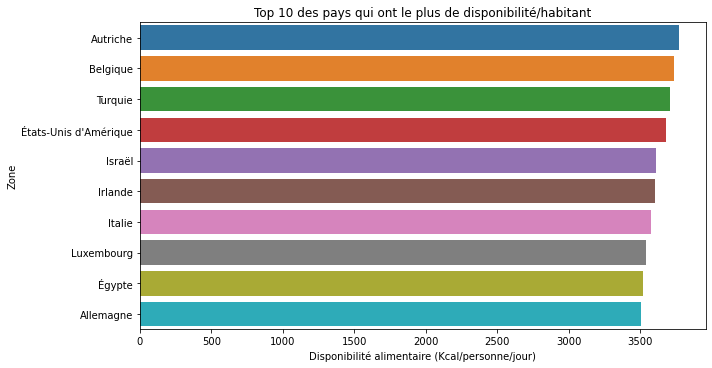

In [72]:
#On affiche les 10 pays qui ont le plus de disponibilité alimentaire/habitant sur un graphique
top_10_dispo = top_dispo.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_dispo, x="Disponibilité alimentaire (Kcal/personne/jour)", y=top_10_dispo.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus de disponibilité/habitant")
plt.show()

## Question 4: Les pays ayant le moins de disponibilité/habitant

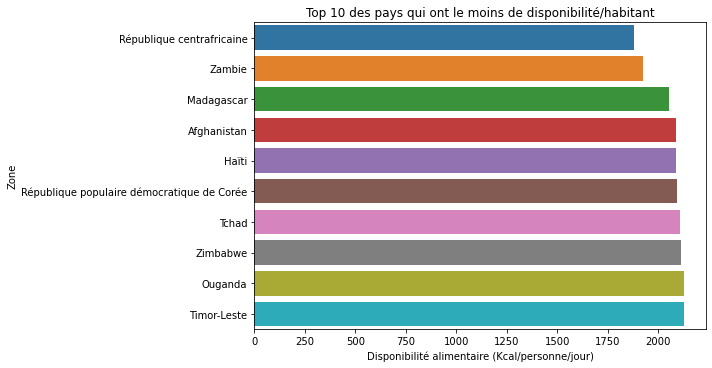

In [73]:
#On affiche les 10 pays qui ont le moins de disponibilité alimentaire/habitant sur un graphique
bottom_10_dispo = top_dispo.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = True)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=bottom_10_dispo, x="Disponibilité alimentaire (Kcal/personne/jour)", y=bottom_10_dispo.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de disponibilité/habitant")
plt.show()

## Question 5: Complement d'étude

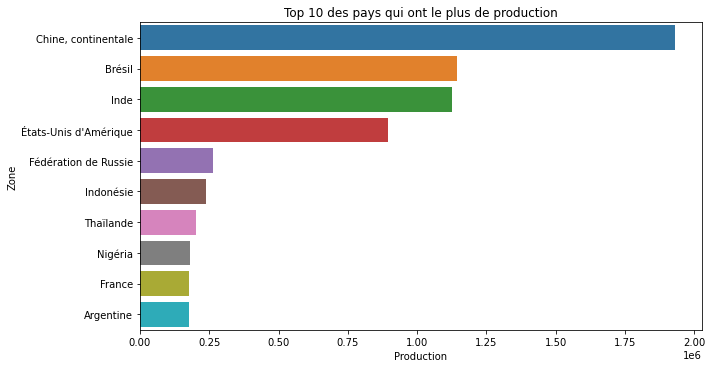

In [74]:
#On affiche les 10 pays qui produisent le plus sur un graphique
top_10_prod = top_dispo.sort_values(by = 'Production', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_prod, x="Production", y=top_10_prod.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus de production")
plt.show()

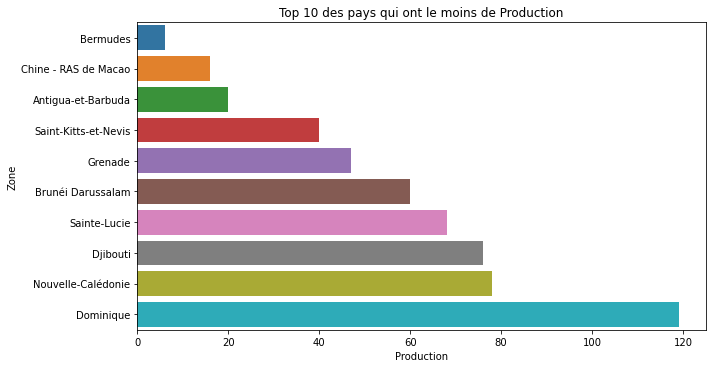

In [75]:
#On affiche les 10 pays avec le moins de production sur un graphique
bottom_10_prod = top_dispo.sort_values(by = 'Production', ascending = True)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=bottom_10_prod, x="Production", y=bottom_10_prod.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de Production")
plt.show()

Sur les 10 pays en sous-nutriton , 6 font partis des pays avec le moins de disponibilité/habitants


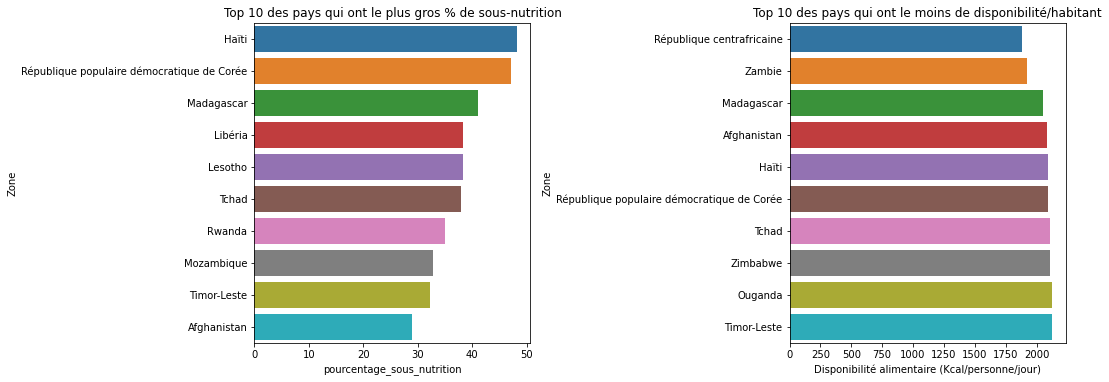

In [76]:
#On compare deux graphique

fig = plt.figure(figsize=(15,10))

plt.subplot(221)
sns.barplot(data=top_10_nutri, x="pourcentage_sous_nutrition", y=top_10_nutri.index)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus gros % de sous-nutrition")


plt.subplot(222)
sns.barplot(data=bottom_10_dispo, x="Disponibilité alimentaire (Kcal/personne/jour)", y=bottom_10_dispo.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de disponibilité/habitant")

print("Sur les 10 pays en sous-nutriton , 6 font partis des pays avec le moins de disponibilité/habitants")

Parmi les 10 pays qui ont le moins de production, aucun ne fait parti des 10 pays qui reçoient le plus d'aide alimentaire depuis 2013 


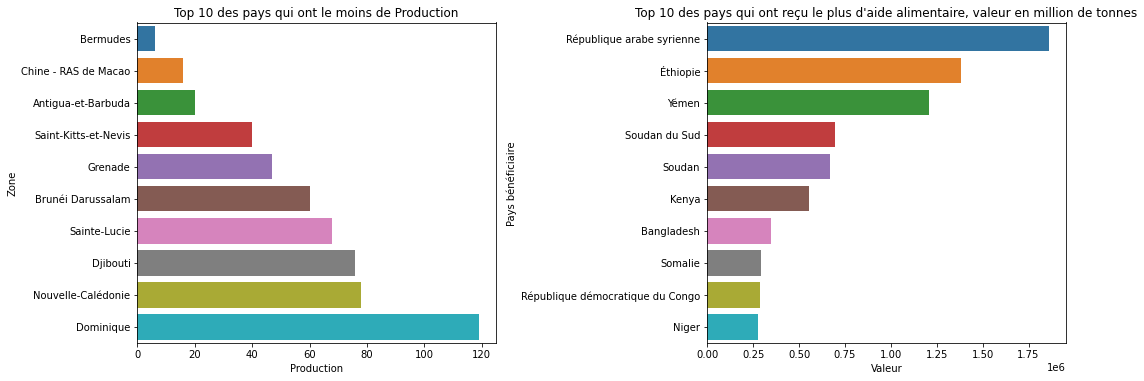

In [77]:
#On compare deux graphique

fig = plt.figure(figsize=(15,10))

plt.subplot(221)
sns.barplot(data=bottom_10_prod, x="Production", y=bottom_10_prod.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de Production")


plt.subplot(222)
sns.barplot(data=top_10_aide, x="Valeur", y=top_10_aide.index)
plt.tight_layout()
plt.title("Top 10 des pays qui ont reçu le plus d'aide alimentaire, valeur en million de tonnes")

print("Parmi les 10 pays qui ont le moins de production, aucun ne fait parti des 10 pays qui reçoient le plus d'aide alimentaire depuis 2013 ")

In [78]:
top_10_aide.head(10)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


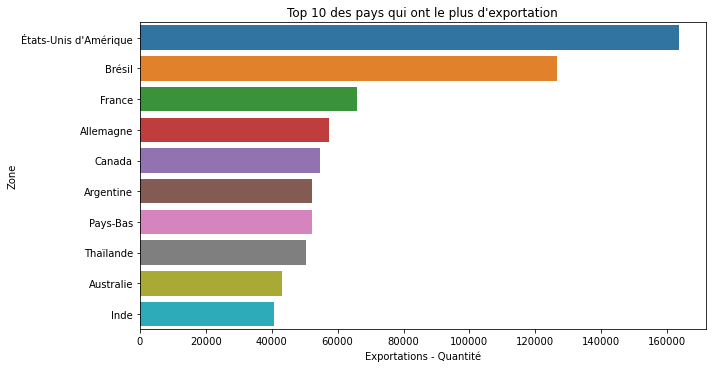

In [79]:
#On affiche les 10 pays qui exportent le plus sur un graphique
top_10_expor = top_dispo.sort_values(by = 'Exportations - Quantité', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_expor, x="Exportations - Quantité", y=top_10_expor.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus d'exportation")
plt.show()

Parmi les 10 pays qui ont letaux le plus important de sous-nutrition, aucun ne fait parti des 10 pays qui reçoient le plus d'aide alimentaire depuis 2013 


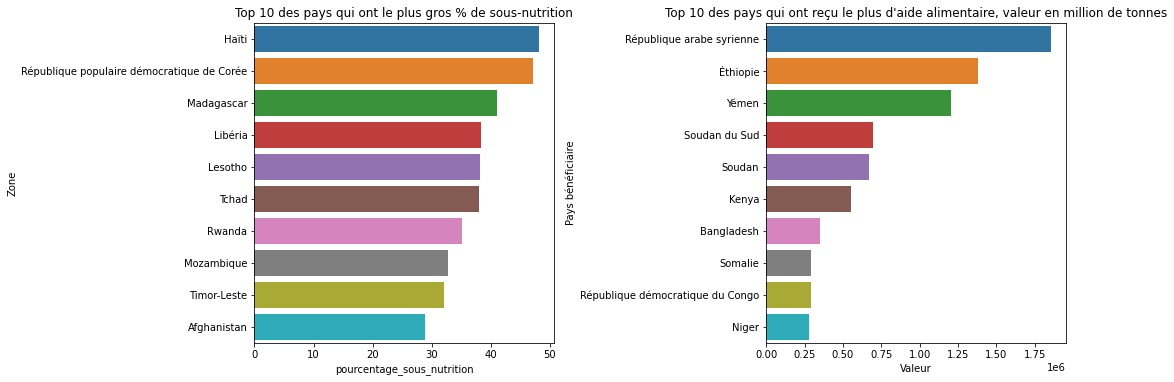

In [81]:
#On compare deux graphique

fig = plt.figure(figsize=(15,10))

plt.subplot(221)
sns.barplot(data=top_10_nutri, x="pourcentage_sous_nutrition", y=top_10_nutri.index)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus gros % de sous-nutrition")


plt.subplot(222)
sns.barplot(data=top_10_aide, x="Valeur", y=top_10_aide.index)
plt.tight_layout()
plt.title("Top 10 des pays qui ont reçu le plus d'aide alimentaire, valeur en million de tonnes")

print("Parmi les 10 pays qui ont letaux le plus important de sous-nutrition, aucun ne fait parti des 10 pays qui reçoient le plus d'aide alimentaire depuis 2013 ")